# Mount and import

In [277]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 6.6 MB/s 
     |████████████████████████████████| 9.8 MB 38.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
import missingno as msno
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2,f_regression
call1 = pd.read_csv('/content/drive/MyDrive/Dataset/call_center/case_data_calls.csv')
call2 = pd.read_csv('/content/drive/MyDrive/Dataset/call_center/case_data_reservations.csv')

#EDA

In [428]:
call1.shape

(1155, 1)

In [429]:
call2.shape

(790, 1)

In [430]:
df1 = call1['date;calls;weekday'].str.split(';', expand=True)
df1.columns = ['date', 'calls', 'weekday']
df1.head()
df1['date'] = pd.to_datetime(df1.date,format='%d-%m-%Y') 
df1.head()

,date,calls,weekday
0,2013-01-01,2429,2
1,2013-01-02,3881,3
2,2013-01-03,3560,4
3,2013-01-04,3155,5
4,2013-01-05,1538,6


In [431]:
df2 = call2['date;reservations_2months_advance;total_reservations;summer_break;christmas_break;special_day'].str.split(';', expand=True)
df2.columns = ['date', 'reservations_2months_advance', 'total_reservations', 'summer_break', 'christmas_break', 'special_day']
df2.head()
df2['date'] = pd.to_datetime(df2.date,format='%d-%m-%Y') 
df2.head()

,date,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
date,,,,,,
0,2014-01-01,1494,7794,0,1,1
1,2014-01-02,2891,20074,0,1,0
2,2014-01-03,2790,17905,0,1,0
3,2014-01-04,2504,10880,0,0,0
4,2014-01-05,1522,8333,0,0,0


In [432]:
df1.isnull().sum()
#df2.isnull().sum()

date       0
calls      0
weekday    0
dtype: int64

In [433]:
df1[['calls', 'weekday']] = df1[['calls', 'weekday']].astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1155 non-null   datetime64[ns]
 1   calls    1155 non-null   int64         
 2   weekday  1155 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 27.2 KB


In [434]:
df1.describe()

,calls,weekday
count,1155.000000,1155.000000
mean,4801.690909,4.000000
std,2114.475574,2.000866
min,1059.000000,1.000000
25%,3279.500000,2.000000
50%,4471.000000,4.000000
75%,5970.000000,6.000000
max,12864.000000,7.000000


In [435]:
df2.columns

Index(['date', 'reservations_2months_advance', 'total_reservations',
       'summer_break', 'christmas_break', 'special_day'],
      dtype='object')

In [436]:
col = ['reservations_2months_advance', 'total_reservations',
     'summer_break', 'christmas_break', 'special_day']
     
for i in col:
  df2[i] = df2[i].astype('int')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          790 non-null    datetime64[ns]
 1   reservations_2months_advance  790 non-null    int64         
 2   total_reservations            790 non-null    int64         
 3   summer_break                  790 non-null    int64         
 4   christmas_break               790 non-null    int64         
 5   special_day                   790 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 37.2 KB


In [437]:
df2.set_index('date', inplace=True)


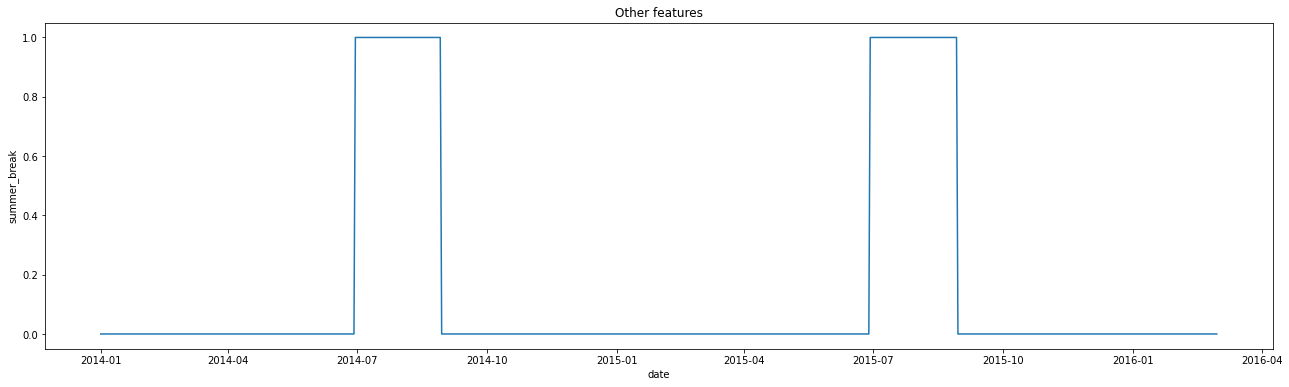

In [438]:
plt.figure(figsize=(22,6))
sns.lineplot(x=df2.index, y=df2['summer_break'])
plt.title('Other features')
plt.show()

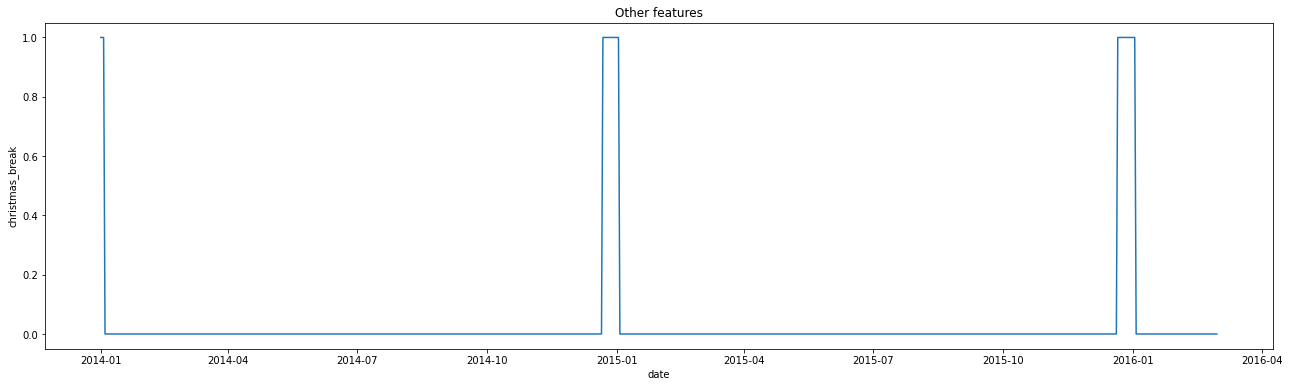

In [439]:
plt.figure(figsize=(22,6))
sns.lineplot(x=df2.index, y=df2['christmas_break'])
plt.title('Other features')
plt.show()

In [440]:
df1.drop('weekday', axis = 1, inplace = True)

In [441]:
df1.set_index('date', inplace=True)

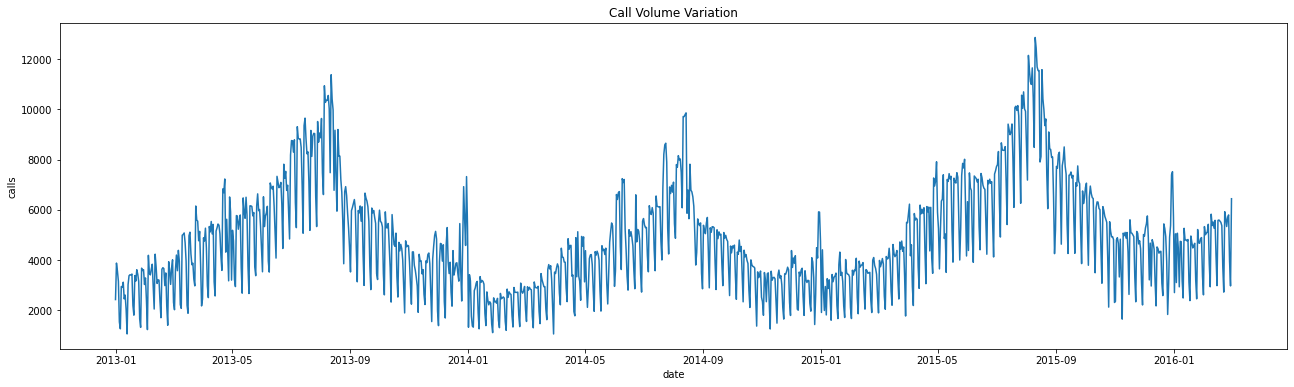

In [442]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(22,6))
sns.lineplot(x=df1.index, y=df1['calls'])
plt.title('Call Volume Variation')
plt.show()

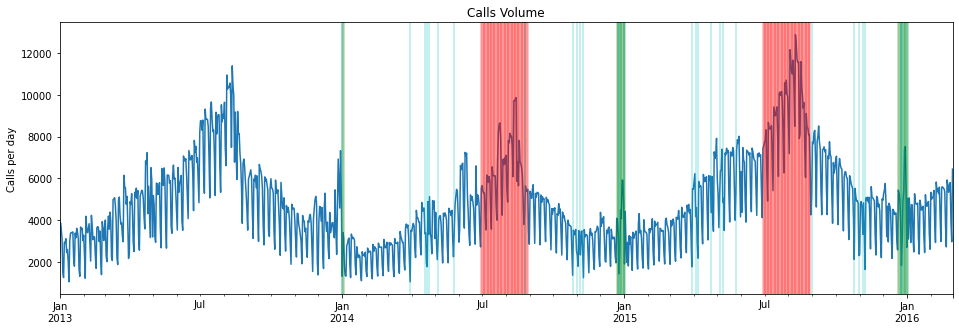

In [443]:
title='Calls Volume'
ylabel='Calls per day'
xlabel='' 

ax = df1['calls'].plot(figsize=(16,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for a in df2.query('summer_break==1').index:       # for days where summer_break == 1
    ax.axvline(x=a, color='r', alpha = 0.3)  # add a semi-transparent red line
for b in df2.query('christmas_break==1').index:    # for days where christmas_break == 1
    ax.axvline(x=b, color='g', alpha = 0.3)
for c in df2.query('special_day==1').index:    # for days where special_day == 1
    ax.axvline(x=c, color='c', alpha = 0.3)

Spike happens in christmas and summer_break, but not significant in special days

In [444]:
df1 = df1.merge(df2, on='date', how='inner')
df1.shape #Only reserve the dates recorded with special_days, summer_break, christmas_break...etc

df1.head()

,calls,reservations_2months_advance,total_reservations,summer_break,christmas_break,special_day
date,,,,,,
2014-01-01,1327,1494,7794,0,1,1
2014-01-02,3417,2891,20074,0,1,0
2014-01-03,3178,2790,17905,0,1,0
2014-01-04,1767,2504,10880,0,0,0
2014-01-05,1374,1522,8333,0,0,0


In [445]:
df1.drop(['reservations_2months_advance','total_reservations'], axis = 1, inplace = True)

In [446]:
df1.head()

,calls,summer_break,christmas_break,special_day
date,,,,
2014-01-01,1327,0,1,1
2014-01-02,3417,0,1,0
2014-01-03,3178,0,1,0
2014-01-04,1767,0,0,0
2014-01-05,1374,0,0,0


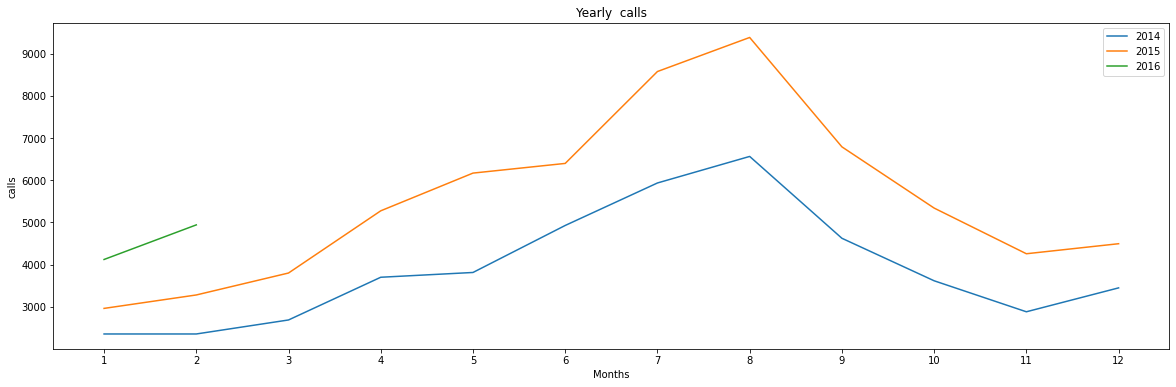

In [447]:
#creating a pivot table to plot the monthly CALLS through the years
df1['dates'] = df1.index.date
df1["month"] = df1.index.month
df1['year'] = df1.index.year

pivot = pd.pivot_table(df1, values='calls', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Yearly  calls')
plt.xlabel('Months')
plt.ylabel('calls')
plt.xticks([x for x in range(1,13)])
plt.legend()
plt.show()

In [448]:
df1['year'].eq(2015).sum() # check days in each year

365

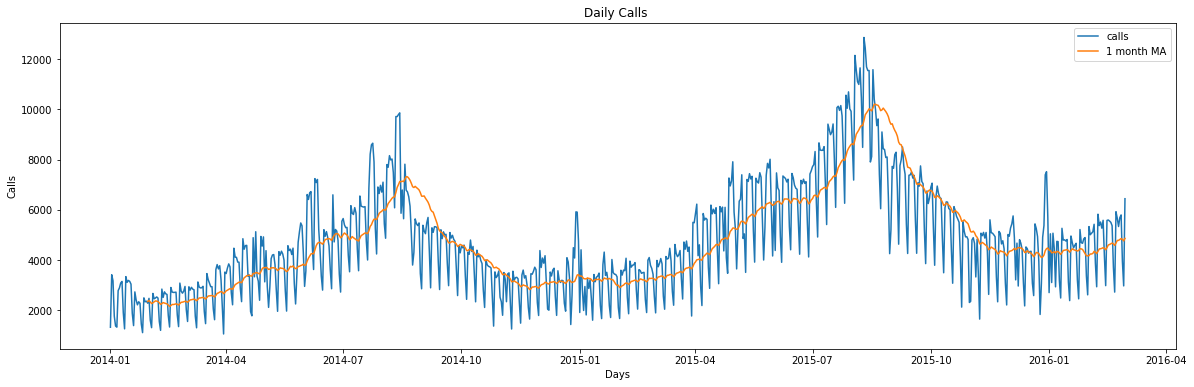

In [449]:
#To Observe Trends in the data
quart_avg = pd.pivot_table(df1, values='calls', index='dates', aggfunc='mean')
quart_avg['1 month MA'] = quart_avg['calls'].rolling(30).mean() #30days rolling MA
quart_avg[['calls','1 month MA']].plot(figsize=(20,6))
plt.title('Daily Calls ')
plt.xlabel('Days')
plt.ylabel('Calls')
#plt.xticks([x for x in range(2013-01-01, 2016-02-29 ,1)])
plt.show()

Dickey–Fuller test: p=0.263152


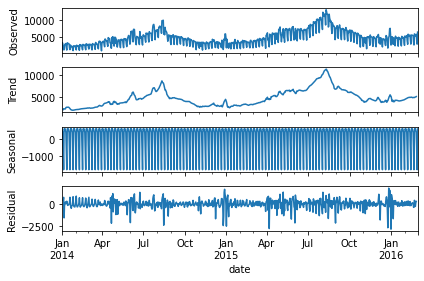

In [450]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df1.calls, model='additive').plot()
print("Dickey–Fuller test: p=%f" % adfuller(df1.calls)[1])

<Figure size 432x288 with 0 Axes>

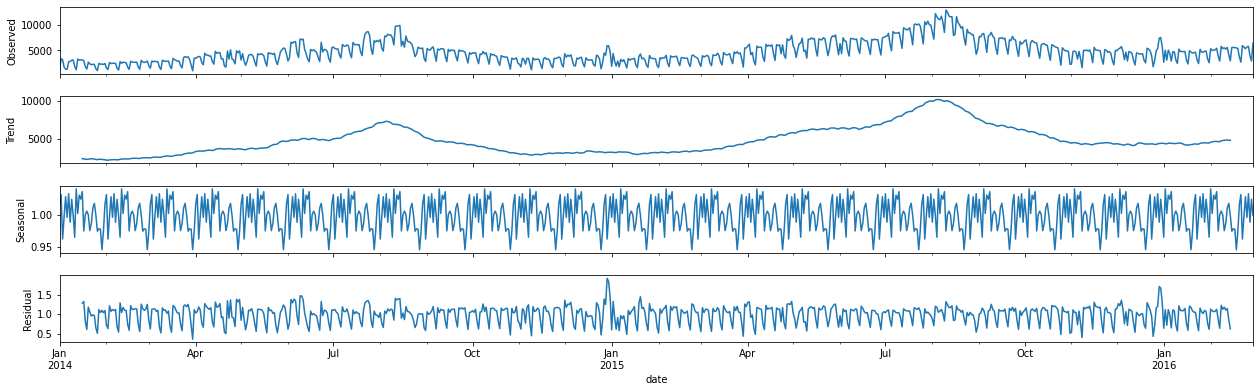

In [451]:
result = seasonal_decompose(df1['calls'], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(20, 6)
fig.show()

clear seasonality within the data and the trend is increasing and decreasing sometimes due to the holidays

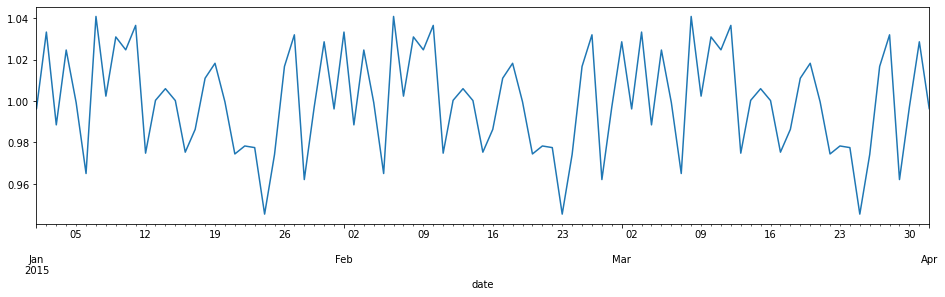

In [452]:
result.seasonal.plot(figsize = (16,4), xlim=('2015-01-01','2015-04-01'))
plt.show()

no seasonality within month OR quarter

In [453]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [454]:
adf_test(df1['calls'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -2.054613
p-value                   0.263152
# lags used              21.000000
# observations          768.000000
critical value (1%)      -3.438893
critical value (5%)      -2.865311
critical value (10%)     -2.568778
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [455]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

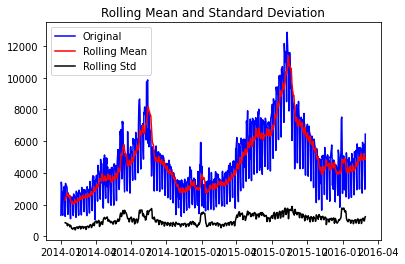

In [456]:
df_call = df1['calls']
test_stationarity(df_call)

- mean is not stationary 
- std of the data is almost constant. (stationary)

#Run auto arima to find the best fit

In [457]:
# For SARIMA Orders we set seasonal=True and pass in an m value, 7 as its daily data
from pmdarima import auto_arima   
model_autoarima = auto_arima(df1['calls'], seasonal=True,m=7)

/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(1,1,0)(2,0,0)[7] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py", line 512, in _fit_wrapper
    **fit_args)
  File "/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 483, in fit
    # Initialization (this is done here rather than in the constructor
  File "/usr/local/lib/python3.7/dist-pack

In [458]:
model_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  790
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -6256.806
Date:                           Wed, 22 Jun 2022   AIC                          12523.613
Time:                                   12:21:55   BIC                          12546.966
Sample:                                        0   HQIC                         12532.590
                                           - 790                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0105      0.719      0.015      0.988      -1.399       1.420
ma.L1         -0.5700      0.021    -27.240      0.000      -0.611      -0.529
ar.S.L7        0.9955      0.003    346.817      0.000       0.990       1.001
ma.S.L7       -0.8619      0.018    -47.849      0.000      -0.897      -0.827
sigma2      4.431e+05   1.13e+04     39.307      0.000    4.21e+05    4.65e+05
===================================================================================
Ljung-Box (Q):                       67.78   Jarque-Bera (JB):              1458.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.80
Prob(H) (two-sided):                  0.38   Kurtosis:                         9.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

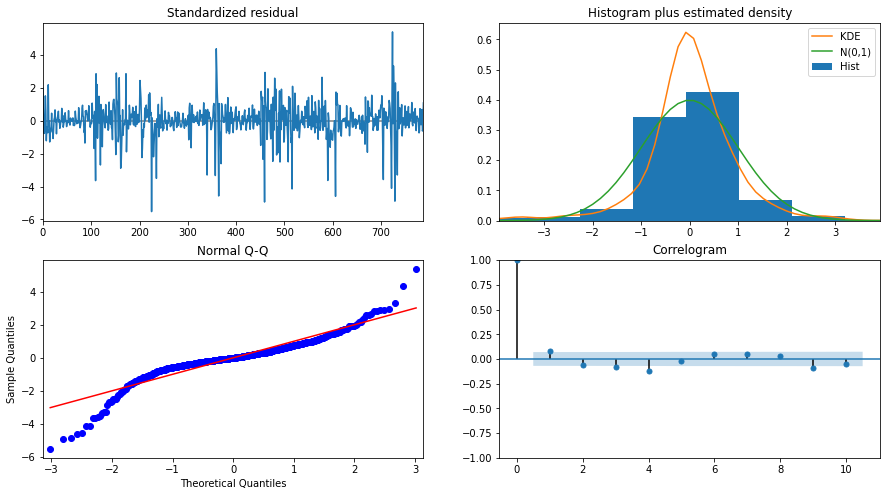

In [459]:
model_autoarima.plot_diagnostics(figsize=(15,8))
plt.show()

This provides an SARIMAX seasonal order of (SARIMAX(0, 1, 1)x(1, 0, 1, 7)	.

In [460]:
len(df1)

790

In [563]:
train = df1.iloc[:760]
test = df1.iloc[760:] #30days

In [564]:
len(train)

760

In [565]:
len(test)

30

#Fit (SARIMAX(0, 1, 1)x(1, 0, 1, 7) Model

In [566]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['calls'],order=(0,1,1),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  periods=len(index) + 1,
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             calls   No. Observations:                  760
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -6033.931
Date:                           Wed, 22 Jun 2022   AIC                          12075.863
Time:                                   12:49:55   BIC                          12094.391
Sample:                               01-01-2014   HQIC                         12082.998
                                    - 01-30-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6347      0.022    -29.297      0.000      -0.677      -0.592
ar.S.L7        0.9940      0.004    266.983      0.000       0.987       1.001
ma.S.L7       -1.1735      0.030    -39.256      0.000      -1.232      -1.115
sigma2       3.66e+05   2.19e+04     16.747      0.000    3.23e+05    4.09e+05
===================================================================================
Ljung-Box (Q):                       68.49   Jarque-Bera (JB):              1233.94
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.83
Prob(H) (two-sided):                  0.08   Kurtosis:                         9.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [567]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('Predicted') #SARIMAX (0,1,1)*(1,0,1,7)

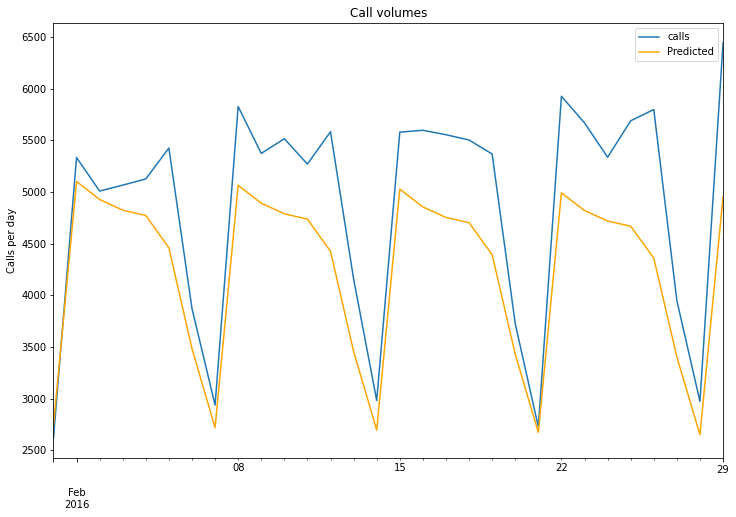

In [568]:
# Plot predictions against known values
title='Call volumes'
ylabel='Calls per day'
xlabel=''

ax = test['calls'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('calls==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.5);

In [569]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(test['calls'], predictions)
error2 = rmse(test['calls'], predictions)

print(f'SARIMA(0,1,1)(1,0,1,7) MSE Error: {error1:11.10}')
print(f'SARIMA(0,1,1)(1,0,1,7) RMSE Error: {error2:11.10}')

SARIMA(0,1,1)(1,0,1,7) MSE Error: 526947.1252
SARIMA(0,1,1)(1,0,1,7) RMSE Error: 725.9112378


#Add features  'summer_break', 'christmas_break', 'special_day' SKIP THIS!!!

In [584]:
model = SARIMAX(train['calls'],exog=train['summer_break'],
                order=(1,1,1),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
#results.summary()
exog_forecast = test[['summer_break']]  # requires two brackets to yield a shape of (35,1)
predictions_sum = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  periods=len(index) + 1,
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  


In [587]:
model = SARIMAX(train['calls'],exog=train['christmas_break'],
                order=(1,1,1),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
#results.summary()
exog_forecast = test[['christmas_break']] 
predictions_chr = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  periods=len(index) + 1,
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  


In [588]:
model = SARIMAX(train['calls'],exog=train['special_day'],
                order=(1,1,1),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
#results.summary()
exog_forecast = test[['special_day']] 
predictions_spe = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  periods=len(index) + 1,


#Evaluatie Model

In [582]:
def mean_absolute_percentage_error(y_true, y_pred): 
    #y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_pred - y_true) /np.abs(y_true))) * 100

In [583]:
mean_absolute_percentage_error(test['calls'], predictions)

12.104260900881185

In [589]:
mean_absolute_percentage_error(test['calls'], predictions_sum)

13.195912581993651

In [590]:
mean_absolute_percentage_error(test['calls'], predictions_chr)

9.836953301434386

In [592]:
mean_absolute_percentage_error(test['calls'], predictions_spe) #Add special_day has lowest mape

9.70822858261451

In [597]:
# Print values from SARIMA above
print(f'SARIMA(0,1,1)(1,0,1,7) MSE Error: {error1:11.10}')
print(f'SARIMA(0,1,1)(1,0,1,7) RMSE Error: {error2:11.10}')
print()

error1x = mse(test['calls'], predictions_spe)
error2x = rmse(test['calls'], predictions_spe)

# Print new SARIMAX values
print(f'SARIMAX(0,1,1)(1,0,1,7) MSE Error: {error1x:11.10}')
print(f'SARIMAX(0,1,1)(1,0,1,7) RMSE Error: {error2x:11.10}') #Better

SARIMA(0,1,1)(1,0,1,7) MSE Error: 526947.1252
SARIMA(0,1,1)(1,0,1,7) RMSE Error: 725.9112378

SARIMAX(0,1,1)(1,0,1,7) MSE Error: 314966.1635
SARIMAX(0,1,1)(1,0,1,7) RMSE Error: 561.2184633


#Forecast future (Out of sample forecasting)

In [613]:
model = SARIMAX(train['calls'],order=(0,1,1),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
results.summary()
forecast = results.predict(len(df1), len(df1)+7, dynamic=False).rename('Forecast') #SARIMAX (0,1,1)*(1,0,1,7)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  periods=len(index) + 1,
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  


[Text(0, 0.5, 'Calls per day'), Text(0.5, 0, '')]

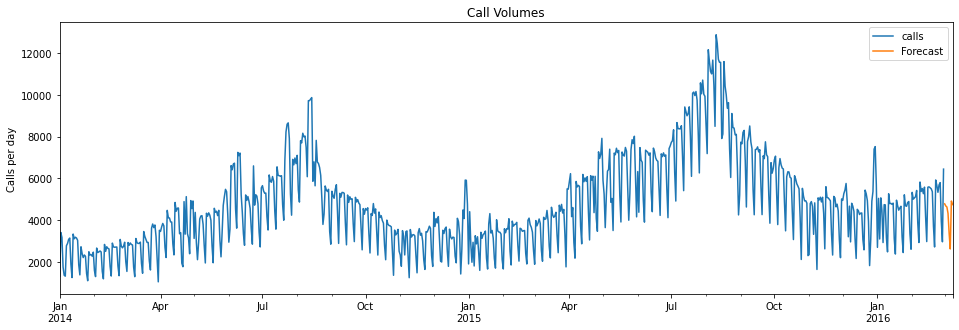

In [614]:
# Plot the forecast alongside historical values
title='Call Volumes'
ylabel='Calls per day'
xlabel=''

ax = df1['calls'].plot(legend=True,figsize=(16,5),title=title)
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
#for x in df1.query('special_day==1').index: 
#    ax.axvline(x=x, color='red', alpha = 0.4);

In [615]:
forecast

2016-03-01    4785.677313
2016-03-02    4685.297962
2016-03-03    4634.866854
2016-03-04    4328.532343
2016-03-05    3376.621636
2016-03-06    2629.431975
2016-03-07    4920.189762
2016-03-08    4750.727165
Freq: D, Name: Forecast, dtype: float64

#Erlang-C Method
 (Forecast operator capacity for next week)

In [616]:
pip install pyworkforce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.5 MB 7.2 MB/s 
     |████████████████████████████████| 407 kB 52.0 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220527125636 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.1 which is incompatible.
tensorflow-metadata 1.8.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.1 which is incompatible.
googleapis-common-protos 1.56.2 requires protobuf<4.0.0dev,>=3.15.0, but you have protobuf 4.21.1 which is incompatible.
google-cloud-bigquery-storage 1.1.2 requires protobuf<4.0.0dev, but you have protobuf 4.21.1 whi

Erlang-C should be used when failure to get a free resource results in the customer being added into a queue. The customers stay in the queue until a free resource can be found.

In [617]:
#Predicted calls for next 30days
forecast
a = forecast.to_list()
a = list(map(int, a))


**Transactions**: Number of incoming requests

**Resource**: The element that handles a transaction

**Arrival rate**: The number of incoming transactions in a time interval

**Average speed of answer (ASA)**: Average time that a transaction waits in the queue to be attended by a resource

**Average handle time (AHT)**: Average time that takes to a single resource to attend a transaction

**Shrinkage**: Expected percentage of time that a server is not available, for example, due to breaks, scheduled training, etc.

**Occupancy**: Percentage of time that a resource is handling a transaction

**Service level**: Percentage of transactions that arrives at a resource before a target ASA

In [618]:
from pyworkforce.queuing import MultiErlangC
param_grid = {"transactions": a, "aht": [3], "interval": [10*60], "asa": [20 / 60], "shrinkage": [0.3]}  
#aht = 3 mins, interval = (10hr*60mins) /days, asa = 20sec, shrinkage = 30%

multi_erlang = MultiErlangC(param_grid=param_grid, n_jobs=-1)
required_positions_scenarios = {"service_level": [0.8], "max_occupancy": [0.8]}
positions_requirements = multi_erlang.required_positions(required_positions_scenarios)

print("positions_requirements: ", positions_requirements)

positions_requirements:  [{'raw_positions': 30, 'positions': 43, 'service_level': 0.9145192645912549, 'occupancy': 0.7974999999999999, 'waiting_probability': 0.1678869831529288}, {'raw_positions': 30, 'positions': 43, 'service_level': 0.9338385904826682, 'occupancy': 0.7808333333333334, 'waiting_probability': 0.13736655142197454}, {'raw_positions': 29, 'positions': 42, 'service_level': 0.9072224051763904, 'occupancy': 0.7989655172413793, 'waiting_probability': 0.17732477767736443}, {'raw_positions': 28, 'positions': 40, 'service_level': 0.9328163286885683, 'occupancy': 0.7728571428571429, 'waiting_probability': 0.13619625516674533}, {'raw_positions': 22, 'positions': 32, 'service_level': 0.9030613660577926, 'occupancy': 0.7672727272727274, 'waiting_probability': 0.1712230388576579}, {'raw_positions': 17, 'positions': 25, 'service_level': 0.8469619207150499, 'occupancy': 0.773235294117647, 'waiting_probability': 0.23486716710595895}, {'raw_positions': 31, 'positions': 45, 'service_level

**raw_positions**: Number of positions found assuming shrinkage = 0

**positions**: Number of positions found taking the shrinkage provided by the user

**service_level**: The expected percentage of transactions that don't wait in the queue longer than the target ASA

**occupancy**: The expected occupancy that the system is going to have

**waiting_probability**: The probability that a transaction waits in queue

In [ ]:
#{'raw_positions': 30, 'positions': 43, 'service_level': 0.9145192645912549, 'occupancy': 0.7974999999999999, 'waiting_probability': 0.1678869831529288}
#{'raw_positions': 30, 'positions': 43, 'service_level': 0.9338385904826682, 'occupancy': 0.7808333333333334, 'waiting_probability': 0.13736655142197454}


Example
***  
*   30 - 43 operators should be ready online for 2016-03-01 
*   30 - 43 operators should be ready online for 2016-03-02  

